# Proyecto
* Karen Fuentes
* Marco Ramirez
* Jenifer Arce

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
 # Instalación de librerias
import pandas as pd
import numpy as np
import sys
import re, string, unicodedata
import contractions
import inflect
import nltk
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('spanish')
wpt = nltk.WordPunctTokenizer()
ps = PorterStemmer()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [388]:
def getTrainData():
    # df = pd.read_csv('D57000_complete.csv',
    #                 encoding='utf-8', sep=";")
    df = pd.read_csv('fake_news_spanish.csv',
                    encoding='utf-8', sep=";")
    return df

def getTestData():
    data_test = pd.read_csv(
        'fake_news_test.csv', encoding='utf-8', sep=";")
    return data_test

In [389]:
print('data spanish', getTrainData().shape)
print('data test', getTestData().shape)

data spanish (57063, 5)
data test (1000, 4)


In [390]:
trainData = getTrainData()
trainData.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

In [391]:
trainData.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021


In [392]:
getTestData().head(5)

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


In [393]:
testData = getTestData()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   object
 1   Titulo       999 non-null    object
 2   Descripcion  1000 non-null   object
 3   Fecha        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [394]:
trainData = getTrainData()
print(trainData['Label'].value_counts())

print('='*10, 'datos en nan', '='*10)

print(trainData["ID"].isna().sum())
print(trainData["Label"].isna().sum())
print(trainData["Titulo"].isna().sum())
print(trainData["Descripcion"].isna().sum())
print(trainData["Fecha"].isna().sum())
trainData = trainData[trainData["Titulo"].notna()]
print('='*10, 'Distribución labels', '='*10)
print('label 1:',round(trainData[trainData['Label'] == 1].shape[0]/trainData.shape[0],4),'%')
print('label 0:',round(trainData[trainData['Label'] == 0].shape[0]/trainData.shape[0],4),'%')
print(trainData.shape[0])
trainData = trainData.drop_duplicates(
    subset=["Titulo", 'Descripcion', 'Label'], keep='first')
print(trainData.shape[0])

Label
1    33158
0    23905
Name: count, dtype: int64
========== datos en nan ==========
0
0
16
0
0
========== Distribución labels ==========
label 1: 0.5812 %
label 0: 0.4188 %
57047
56598


In [395]:
from num2words import num2words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode(
              'ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words


def normalize_text(text, repetar_español = False):
    if not repetar_español:
        text = text.replace('á', 'a')
        text = text.replace('é', 'e')
        text = text.replace('í', 'i')
        text = text.replace('ó', 'o')
        text = text.replace('ú', 'u')
        text = text.replace('ü', 'u')
        text = text.replace('ñ', 'n')

    # Eliminate punctuation and special characters by replacing them
    text = text.replace('(', '').replace(')', '')
    text = text.replace('[', '').replace(']', '')
    text = text.replace('{', '').replace('}', '')
    text = text.replace('<', '').replace('>', '')
    return text.lower()

def to_lowercase(words, respetar_español = False):
    return [normalize_text(word, respetar_español) for word in words]


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = num2words(word, lang='es')
           new_words.append(new_word)
       else:
           new_words.append(word)
   return new_words


def remove_stopwords(words):
    nuevas_palabras = []
    for palabra in words:
        if palabra is not None:
            if palabra not in stopwords.words('spanish'):
                nuevas_palabras.append(palabra)
    return nuevas_palabras


def corregir_contracciones_espanol(texto):
    texto = texto.replace('al ', 'a el ').replace(
        'al.', 'a el.')  # "al" a "a el"
    # "del" a "de el"    # Agrega más reglas aquí según sea necesario
    texto = texto.replace('del ', 'de el ').replace('del.', 'de el.')
    return texto

def preprocessing(words, respetar_español = False, respetar_ascii = False):
    words = words.split()
    words = to_lowercase(words, respetar_español)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    if not respetar_ascii:
        words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [396]:
from nltk.stem.snowball import SnowballStemmer


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("spanish")
    return [stemmer.stem(word) for word in words]


def lemmatize_verbs(words):
    """Simple lemmatization for verbs in list of tokenized words"""
    # Simple rule-based lemmatization (you can extend this as needed)
    lemmatized_words = []
    for word in words:
        if word.endswith('ar'):
            lemmatized_words.append(word[:-2])  # Remove 'ar' (basic rule)
        elif word.endswith('er'):
            lemmatized_words.append(word[:-2])  # Remove 'er' (basic rule)
        elif word.endswith('ir'):
            lemmatized_words.append(word[:-2])  # Remove 'ir' (basic rule)
        else:
            # Return the word as is if no rule applies
            lemmatized_words.append(word)
    return lemmatized_words


def stem_and_lemmatize(words):
    """Stem and Lemmatize words"""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

In [397]:
def get_good_test_data(respetar_espanol=False, respetar_ascii=False, lemmatize=False, columns=['Titulo', 'Descripcion'], ):
    trainData = getTrainData()
    trainData = trainData[trainData["Titulo"].notna()]
    trainData = trainData.drop_duplicates(
        subset=["Titulo", 'Descripcion', 'Label'], keep='first')
    for columna in columns:
        trainData[columna] = trainData[columna].apply(
            corregir_contracciones_espanol)
        trainData[columna] = trainData[columna].apply(
            lambda x: preprocessing(x, respetar_espanol, respetar_ascii))
        if lemmatize:
            trainData[columna] = trainData[columna].apply(
                stem_and_lemmatize)
        trainData[columna] = trainData[columna].apply(
            lambda x: ' '.join(map(str, x)))
    
    return trainData[columns+['Label']]

In [398]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB


def superTrain(dataframe):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Naive Bayes": MultinomialNB()
    }

    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("vectorizer", text_transformer),
            ("classifier", model)
        ])

        # Now X_train is a DataFrame, which ColumnTransformer supports
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        results[name] = classification_report(y_test, y_pred, output_dict=True)

    for model_name, report in results.items():
        print(f"\nModelo: {model_name}")
        print(pd.DataFrame(report).T)

    return results


def tune_models_cv(dataframe, cv_folds=5):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    param_grid_xgb = {
        'classifier__n_estimators': [200, 250, 300],
        'classifier__max_depth': [7, 9, 11],
        'classifier__learning_rate': [0.2, 0.3, 0.5]
    }

    param_grid_rf = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }

    models = {
        "XGBoost": (XGBClassifier(eval_metric='logloss'), param_grid_xgb),
        "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf)
    }

    best_models = {}

    for name, (model, param_grid) in models.items():
        pipeline = Pipeline([
            ("vectorizer", text_transformer),
            ("classifier", model)
        ])
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=cv_folds, scoring='f1_macro', n_jobs=-1, verbose=1
        )
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_
        cv_scores = cross_val_score(
            best_model, X, y, cv=cv_folds, scoring='f1_macro', n_jobs=-1)

        best_models[name] = best_model
        print(f"\nMejor modelo para {name}:")
        print(grid_search.best_params_)
        print(
            f"Mejor f1-score en validación cruzada: {grid_search.best_score_:.4f}")
        print(
            f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    return best_models

def trainSpecificModel(dataframe, parameters, cross_validation=True):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    if 'min_samples_split' not in parameters:
        model = XGBClassifier(eval_metric='logloss', n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], learning_rate=parameters['learning_rate'])
    else:
        model = RandomForestClassifier(n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], min_samples_split=parameters['min_samples_split'])
    
    pipeline = Pipeline([
        ("vectorizer", text_transformer),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)

    if cross_validation:
        cv_scores = cross_val_score(
            pipeline, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
        print(f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        results = classification_report(y_test, pipeline.predict(X_test), output_dict=True)
    else:
        y_pred = pipeline.predict(X_test)

        results = classification_report(y_test, y_pred, output_dict=True)
        print(f"\nModelo: XGBoost")
        print("Clasificación detallada:")
        print(pd.DataFrame(results).T)
    return results, pipeline

In [363]:
trainData = get_good_test_data()

In [380]:
from pprint import pprint
goodTrain = superTrain(trainData)

KeyboardInterrupt: 

Logistic Regression
0.8812021555163956

Random Forest
0.9039983165104423

SVM
0.8453311228124185

XGBoost
0.9033778006888313

Naive Bayes
0.797949648540659



In [399]:
for keys in goodTrain:
    print(keys)
    pprint(goodTrain[keys]['macro avg']['f1-score'])


Logistic Regression
0.8850976218427988
Random Forest
0.9019764727135346
SVM
0.8508136855611488
XGBoost
0.9064227143395407
Naive Bayes
0.8073216962781056


In [400]:
pprint(goodTrain['XGBoost'])

{'0': {'f1-score': 0.8846596577392372,
       'precision': 0.972498734604353,
       'recall': 0.8113738738738738,
       'support': 7104.0},
 '1': {'f1-score': 0.9281857709398442,
       'precision': 0.8787659458970415,
       'recall': 0.9834953422438234,
       'support': 9876.0},
 'accuracy': 0.9114840989399293,
 'macro avg': {'f1-score': 0.9064227143395407,
               'precision': 0.9256323402506972,
               'recall': 0.8974346080588487,
               'support': 16980.0},
 'weighted avg': {'f1-score': 0.9099755525548552,
                  'precision': 0.9179813599710545,
                  'recall': 0.9114840989399293,
                  'support': 16980.0}}


In [401]:
pprint(goodTrain['Random Forest'])

{'0': {'f1-score': 0.8828393706549579,
       'precision': 0.9193720469440634,
       'recall': 0.8490990990990991,
       'support': 7104.0},
 '1': {'f1-score': 0.9211135747721113,
       'precision': 0.8971110471254439,
       'recall': 0.9464358039692183,
       'support': 9876.0},
 'accuracy': 0.9057126030624264,
 'macro avg': {'f1-score': 0.9019764727135346,
               'precision': 0.9082415470347536,
               'recall': 0.8977674515341587,
               'support': 16980.0},
 'weighted avg': {'f1-score': 0.9051006215301644,
                  'precision': 0.9064244830919617,
                  'recall': 0.9057126030624264,
                  'support': 16980.0}}


In [402]:
# results = {}
# for respetar_espanol_param in [True, False]:
#     for respetar_ascii_param in [True, False]:
#         for lemmatize_param in [True, False]:
#             trainDataExtensive = get_good_test_data(
#                 respetar_espanol_param, respetar_ascii_param, lemmatize_param)
#             print(
#                 f"\nRespetar español: {respetar_espanol_param}, Respetar ASCII: {respetar_ascii_param}, Lemmatize: {lemmatize_param}")
#             results[(respetar_espanol_param, respetar_ascii_param, lemmatize_param)] = tune_models_cv(
#                 trainDataExtensive)

Mejor modelo para XGBoost:

{'classifier__learning_rate': 0.3, 'classifier__max_depth': 11, 'classifier__n_estimators': 250}

Mejor f1-score en validación cruzada: 0.9294

F1-score promedio en validación cruzada: 0.9294 (+/- 0.0025)

Mejor modelo para Random Forest:

{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}

Mejor f1-score en validación cruzada: 0.9100

F1-score promedio en validación cruzada: 0.9100 (+/- 0.0031)


In [403]:
trainData

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022


In [386]:
best_model = trainSpecificModel(trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

KeyboardInterrupt: 

In [354]:
best_model2 = trainSpecificModel(
    trainData, {'max_depth': None,
                'min_samples_split': 10, 'n_estimators': 300})

F1-score promedio en validación cruzada: 0.9080 (+/- 0.0024)


In [404]:
def get_important_words_from_pipeline(pipeline, top_n=20):
    # Extraer el vectorizador y el modelo del pipeline
    vectorizer = pipeline.named_steps['vectorizer']
    model = pipeline.named_steps['classifier']

    # Obtener las palabras (features) y las importancias
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Verificar si el modelo tiene el atributo feature_importances_
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        raise ValueError(
            "El modelo no tiene el atributo 'feature_importances_'.")

    # Ordenar las palabras por importancia (descendente)
    indices = np.argsort(importances)[::-1]

    # Seleccionar las N palabras más importantes
    top_words = feature_names[indices][:top_n]
    top_importances = importances[indices][:top_n]

    print(f"\nTop {top_n} palabras más importantes para {type(model).__name__}:")
    for word, importance in zip(top_words, top_importances):
        print(f"{word}: {importance:.4f}")

In [356]:
get_important_words_from_pipeline(best_model[1])


Top 20 palabras más importantes para XGBClassifier:
Titulo_tfidf__per: 0.0446
desc_tfidf__per: 0.0305
Titulo_tfidf__narbona: 0.0259
desc_tfidf__equo: 0.0172
Titulo_tfidf__equo: 0.0141
Titulo_tfidf__bng: 0.0135
Titulo_tfidf__sanchez: 0.0134
Titulo_tfidf__eajpnv: 0.0129
Titulo_tfidf__canaria: 0.0125
Titulo_tfidf__maestre: 0.0123
desc_tfidf__eajpnv: 0.0116
desc_tfidf__sanchez: 0.0109
desc_tfidf__generado: 0.0099
desc_tfidf__bng: 0.0097
Titulo_tfidf__prieto: 0.0087
desc_tfidf__narbona: 0.0084
Titulo_tfidf__echenique: 0.0082
desc_tfidf__podemos: 0.0079
Titulo_tfidf__vers: 0.0074
Titulo_tfidf__podemos: 0.0073


In [357]:
get_important_words_from_pipeline(best_model2[1])


Top 20 palabras más importantes para RandomForestClassifier:
desc_tfidf__equo: 0.0245
Titulo_tfidf__equo: 0.0224
Titulo_tfidf__eajpnv: 0.0158
Titulo_tfidf__bng: 0.0153
Titulo_tfidf__narbona: 0.0146
desc_tfidf__per: 0.0143
Titulo_tfidf__cristina: 0.0143
desc_tfidf__bng: 0.0142
Titulo_tfidf__vers: 0.0133
desc_tfidf__eajpnv: 0.0129
Titulo_tfidf__per: 0.0119
Titulo_tfidf__iniciativa: 0.0117
desc_tfidf__vers: 0.0111
desc_tfidf__iniciativa: 0.0105
Titulo_tfidf__sanchez: 0.0088
Titulo_tfidf__canaria: 0.0086
desc_tfidf__podemos: 0.0081
Titulo_tfidf__canarias: 0.0080
Titulo_tfidf__maestre: 0.0075
desc_tfidf__catalunya: 0.0075


In [405]:
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    labels = sorted(set(y_test))  # Ensure labels are sorted and unique
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

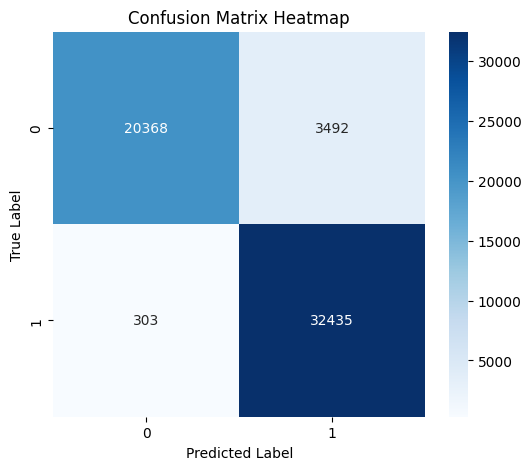

In [359]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = best_model[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)

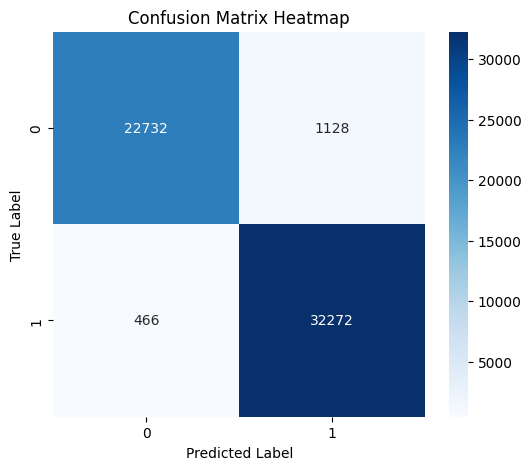

In [360]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = best_model2[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)

In [187]:
trainData = get_good_test_data(1, True, True)
best_model_espanol_lemitize = trainSpecificModel(trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

trainData = get_good_test_data(1, False, True)
best_model_NOTespanol_lemitize = trainSpecificModel(
    trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

trainData = get_good_test_data(1, True, False)
best_model_espanol_NOTlemitize = trainSpecificModel(trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

trainData = get_good_test_data(1, False, False)
best_model_NOTespanol_NOTlemitize = trainSpecificModel(
    trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

F1-score promedio en validación cruzada: 0.9218 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9218 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9212 (+/- 0.0027)
F1-score promedio en validación cruzada: 0.9212 (+/- 0.0027)


F1-score promedio en validación cruzada: 0.9182 (+/- 0.0020)
F1-score promedio en validación cruzada: 0.9064 (+/- 0.0033)


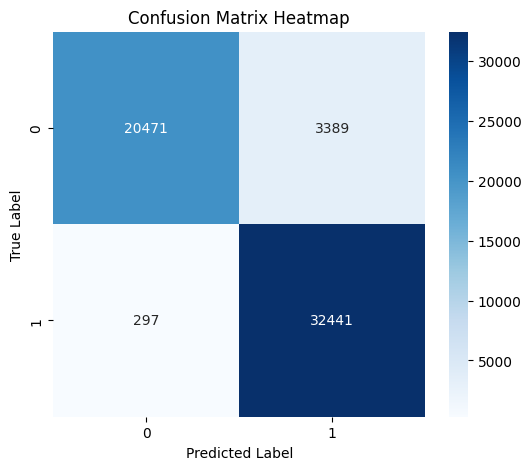

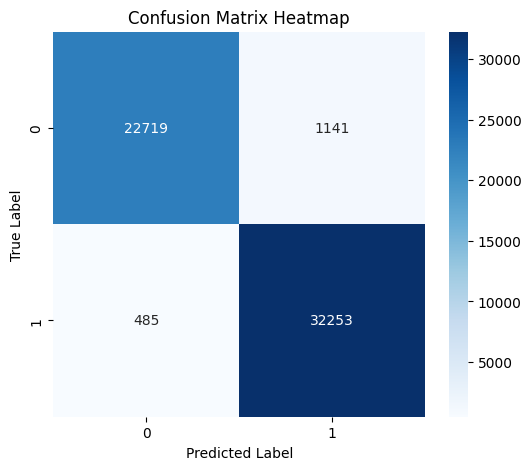

F1-score promedio en validación cruzada: 0.9176 (+/- 0.0036)
F1-score promedio en validación cruzada: 0.9090 (+/- 0.0031)


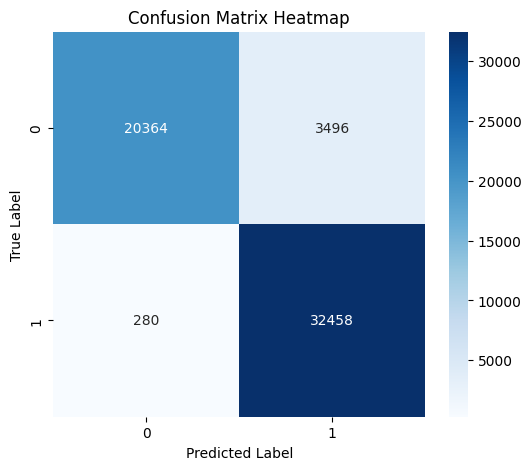

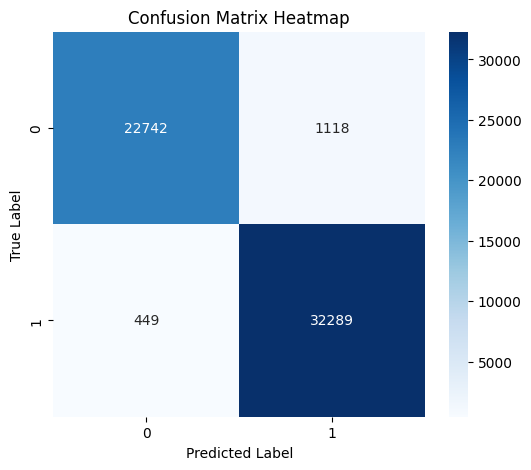

F1-score promedio en validación cruzada: 0.9180 (+/- 0.0025)
F1-score promedio en validación cruzada: 0.9053 (+/- 0.0019)


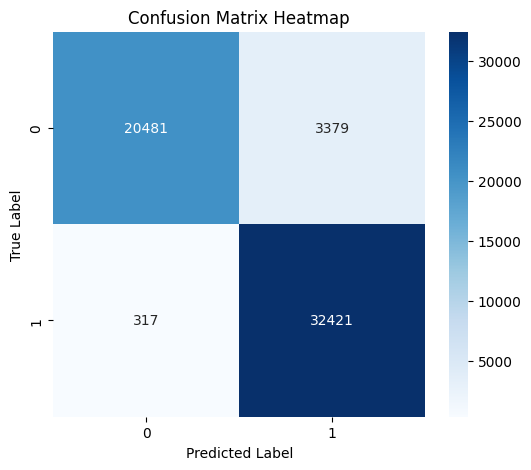

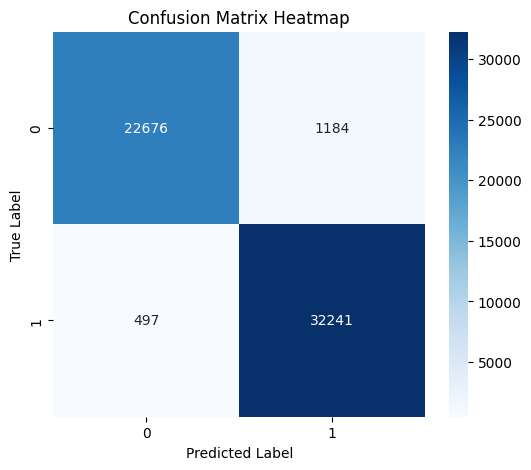

F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9078 (+/- 0.0021)


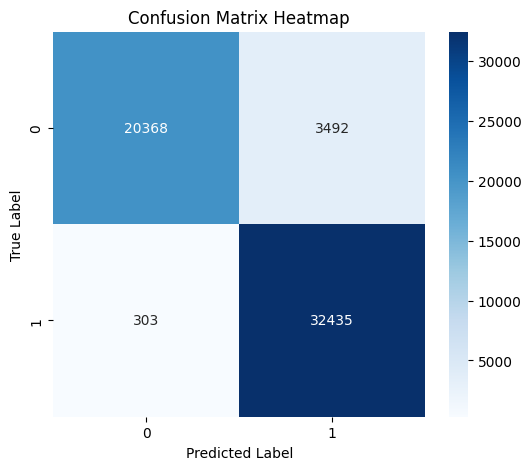

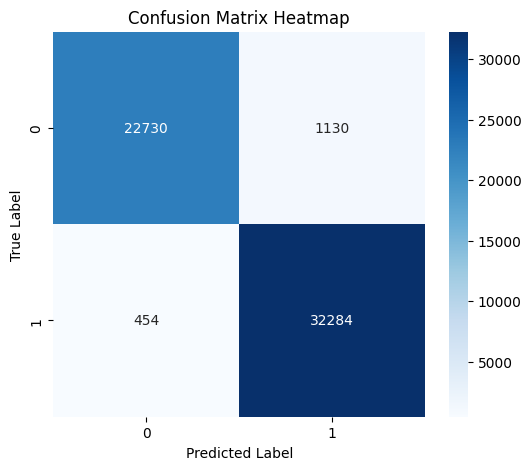

F1-score promedio en validación cruzada: 0.9189 (+/- 0.0023)
F1-score promedio en validación cruzada: 0.9063 (+/- 0.0026)


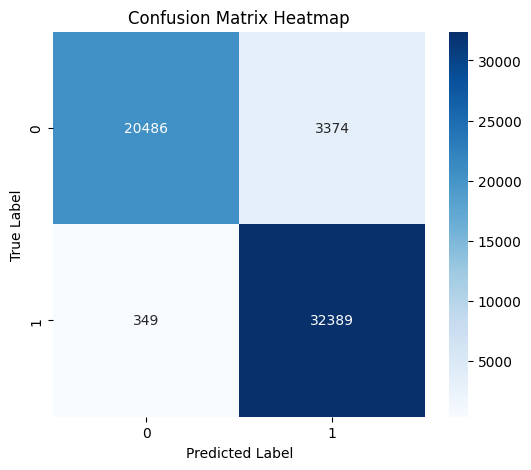

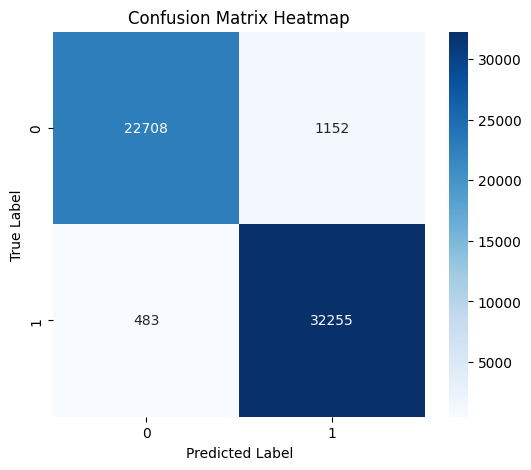

F1-score promedio en validación cruzada: 0.9179 (+/- 0.0018)
F1-score promedio en validación cruzada: 0.9089 (+/- 0.0023)


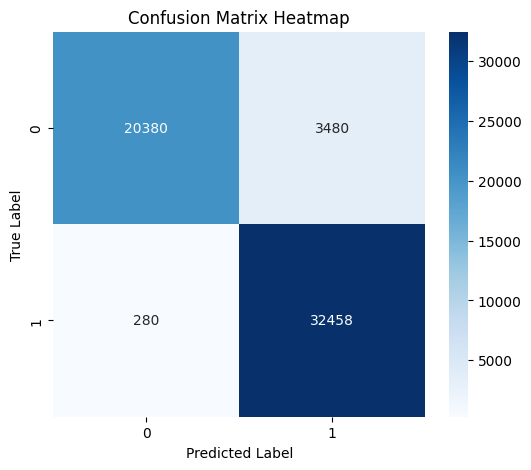

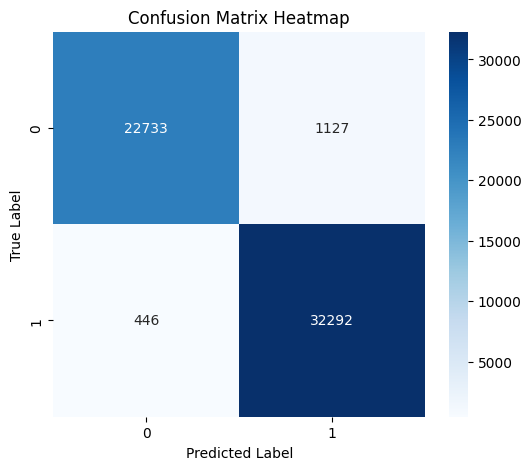

F1-score promedio en validación cruzada: 0.9180 (+/- 0.0025)
F1-score promedio en validación cruzada: 0.9058 (+/- 0.0016)


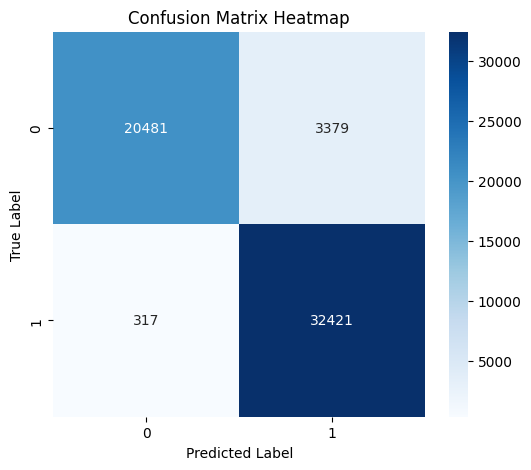

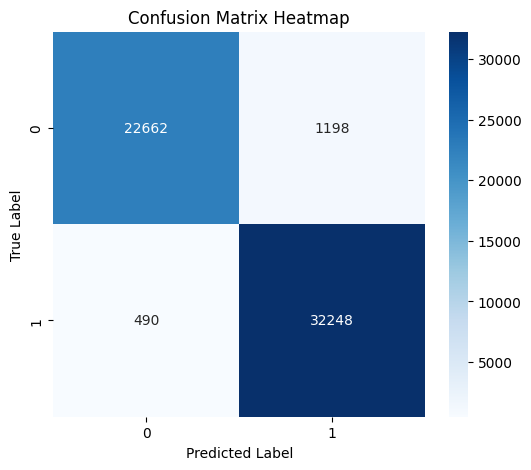

F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9075 (+/- 0.0026)


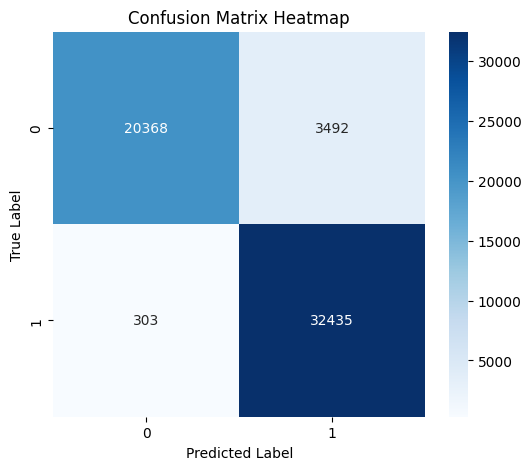

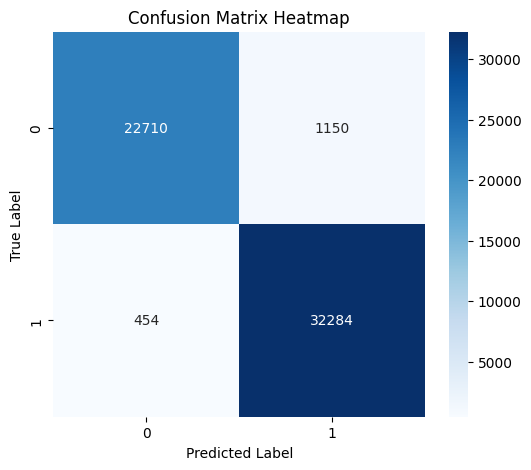

In [407]:
# y_pred = best_model_espanol_lemitize[1].predict(trainData['Descripcion3'])
# plot_confusion_matrix(trainData['Label'], y_pred)
# y_pred = best_model_NOTespanol_lemitize[1].predict(trainData['Descripcion3'])
# plot_confusion_matrix(trainData['Label'], y_pred)
# y_pred = best_model_espanol_NOTlemitize[1].predict(trainData['Descripcion3'])
# plot_confusion_matrix(trainData['Label'], y_pred)
# y_pred = best_model_NOTespanol_NOTlemitize[1].predict(
#     trainData['Descripcion3'])
# plot_confusion_matrix(trainData['Label'], y_pred)

results = {}
for respetar_espanol_param in [True, False]:
    for respetar_ascii_param in [True, False]:
        for lemmatize_param in [True, False]:
            trainDataExtensive = get_good_test_data(
                respetar_espanol_param, respetar_ascii_param, lemmatize_param)
            columnsForTest = ['Titulo', 'Descripcion']
            confusionMatrixData = trainDataExtensive[columnsForTest]
            best_model = trainSpecificModel(
                trainDataExtensive, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})
            best_model2 = trainSpecificModel(
                trainDataExtensive, {'max_depth': None,
                            'min_samples_split': 10, 'n_estimators': 300})
            results[(respetar_espanol_param, respetar_ascii_param, lemmatize_param)] = (best_model, best_model2)
            try:
                y_pred = best_model[1].predict(
                    confusionMatrixData)
                plot_confusion_matrix(trainDataExtensive['Label'], y_pred)
                y_pred = best_model2[1].predict(
                    confusionMatrixData)
                plot_confusion_matrix(trainDataExtensive['Label'], y_pred)
            except:
                print('Error en confusion matrix')
            